In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from pandas.tools import plotting
from collections import OrderedDict
from sklearn import model_selection
import sklearn
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import math

In [4]:
train = pd.read_csv('train.csv', index_col = 0)
test = pd.read_csv('test.csv',index_col=0)

# QUICK LOOK

In [103]:
train.shape

(15120, 55)

In [104]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15120 entries, 1 to 15120
Data columns (total 55 columns):
Elevation                             15120 non-null int64
Aspect                                15120 non-null int64
Slope                                 15120 non-null int64
Horizontal_Distance_To_Hydrology      15120 non-null int64
Vertical_Distance_To_Hydrology        15120 non-null int64
Horizontal_Distance_To_Roadways       15120 non-null int64
Hillshade_9am                         15120 non-null int64
Hillshade_Noon                        15120 non-null int64
Hillshade_3pm                         15120 non-null int64
Horizontal_Distance_To_Fire_Points    15120 non-null int64
Wilderness_Area1                      15120 non-null int64
Wilderness_Area2                      15120 non-null int64
Wilderness_Area3                      15120 non-null int64
Wilderness_Area4                      15120 non-null int64
Soil_Type1                            15120 non-null int64
Soil_T

In [19]:
train.iloc[:,0:10].head()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points
Id,,,,,,,,,,
1,2596,51,3,258,0,510,221,232,148,6279
2,2590,56,2,212,-6,390,220,235,151,6225
3,2804,139,9,268,65,3180,234,238,135,6121
4,2785,155,18,242,118,3090,238,238,122,6211
5,2595,45,2,153,-1,391,220,234,150,6172


In [20]:
train.iloc[:,11:].head()

,Wilderness_Area2,Wilderness_Area3,Wilderness_Area4,Soil_Type1,Soil_Type2,Soil_Type3,Soil_Type4,Soil_Type5,Soil_Type6,Soil_Type7,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
Id,,,,,,,,,,,,,,,,,,,,,
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,5
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,5
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,5


In [106]:
train.describe()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
count,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,...,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000
mean,2749.322553,156.676653,16.501587,227.195701,51.076521,1714.023214,212.704299,218.965608,135.091997,1511.147288,...,0.045635,0.040741,0.001455,0.006746,0.000661,0.002249,0.048148,0.043452,0.030357,4.000000
std,417.678187,110.085801,8.453927,210.075296,61.239406,1325.066358,30.561287,22.801966,45.895189,1099.936493,...,0.208699,0.197696,0.038118,0.081859,0.025710,0.047368,0.214086,0.203880,0.171574,2.000066
min,1863.000000,0.000000,0.000000,0.000000,-146.000000,0.000000,0.000000,99.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2376.000000,65.000000,10.000000,67.000000,5.000000,764.000000,196.000000,207.000000,106.000000,730.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
50%,2752.000000,126.000000,15.000000,180.000000,32.000000,1316.000000,220.000000,223.000000,138.000000,1256.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000
75%,3104.000000,261.000000,22.000000,330.000000,79.000000,2270.000000,235.000000,235.000000,167.000000,1988.250000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000
max,3849.000000,360.000000,52.000000,1343.000000,554.000000,6890.000000,254.000000,254.000000,248.000000,6993.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,7.000000


# DATA EXPLORATORY

In [107]:
train.isnull().sum()

Elevation                             0
Aspect                                0
Slope                                 0
Horizontal_Distance_To_Hydrology      0
Vertical_Distance_To_Hydrology        0
Horizontal_Distance_To_Roadways       0
Hillshade_9am                         0
Hillshade_Noon                        0
Hillshade_3pm                         0
Horizontal_Distance_To_Fire_Points    0
Wilderness_Area1                      0
Wilderness_Area2                      0
Wilderness_Area3                      0
Wilderness_Area4                      0
Soil_Type1                            0
Soil_Type2                            0
Soil_Type3                            0
Soil_Type4                            0
Soil_Type5                            0
Soil_Type6                            0
Soil_Type7                            0
Soil_Type8                            0
Soil_Type9                            0
Soil_Type10                           0
Soil_Type11                           0


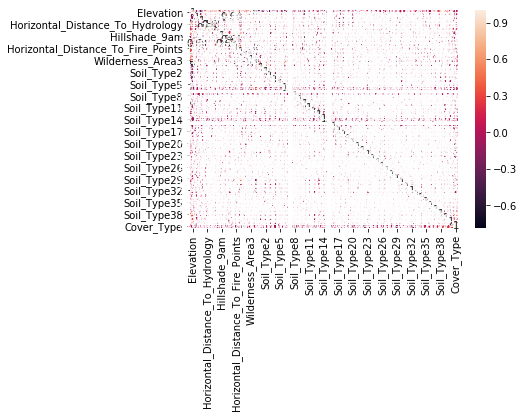

In [108]:
import seaborn as sns
sns.heatmap(train.corr(), annot=True)

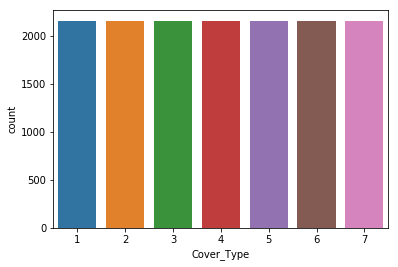

In [109]:
sns.countplot(x='Cover_Type', data=train)
plt.show()

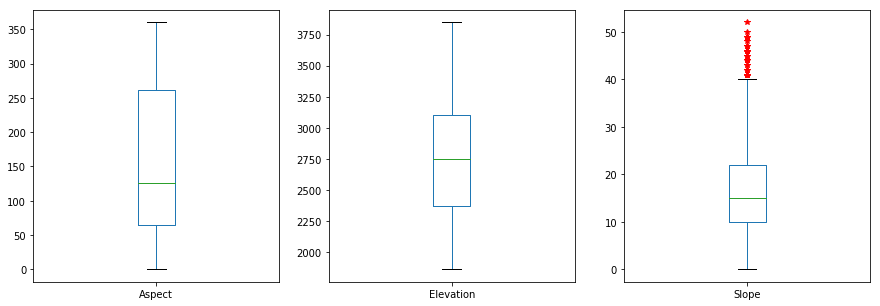

In [110]:
plt.figure(figsize=(15,5))
plt.subplot(131)
train.boxplot(column='Aspect',sym='r*',grid=False)
plt.subplot(132)
train.boxplot(column='Elevation', sym='r*', grid=False)
plt.subplot(133)
train.boxplot(column='Slope', sym='r*', grid=False)
plt.show()

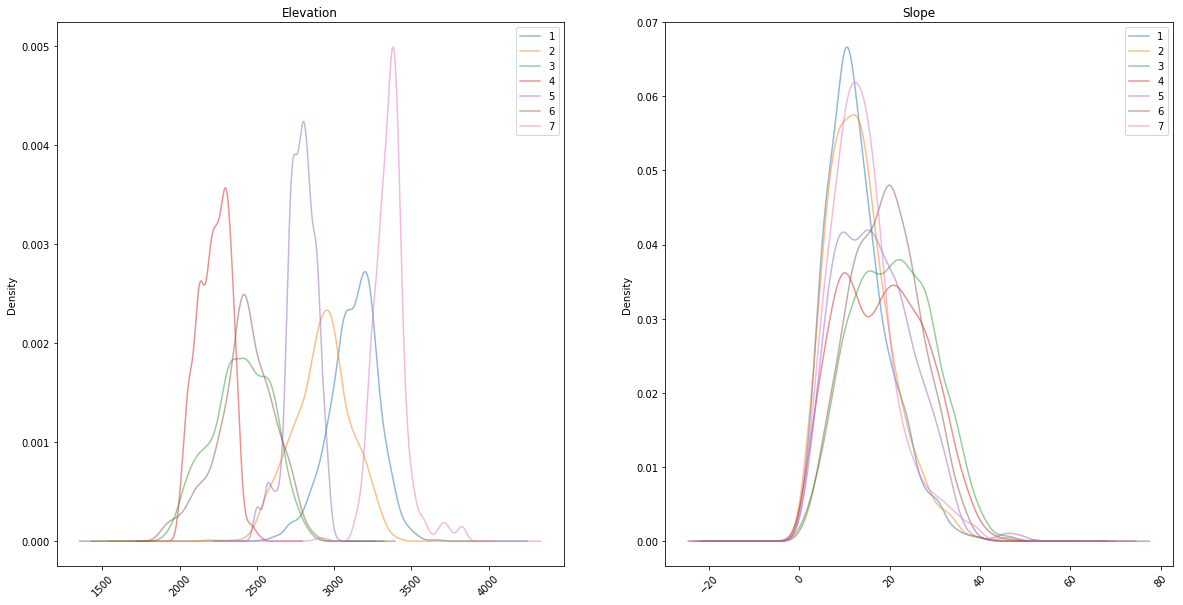

In [111]:
plt.figure(figsize=(20,10))
plt.subplot(121)
train.groupby('Cover_Type').Elevation.plot.density(alpha=0.5, legend=True, title='Elevation', rot=45)
plt.subplot(122)
train.groupby('Cover_Type').Slope.plot.density(alpha=0.5, legend=True, title='Slope', rot=45)
plt.show()

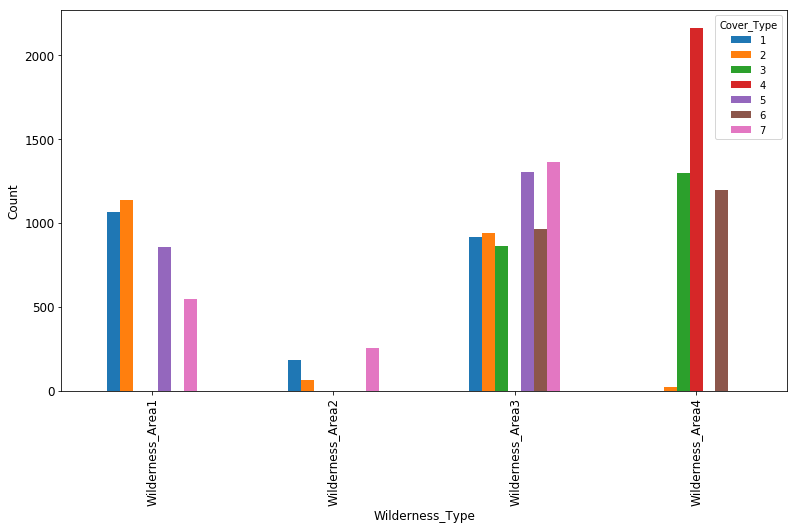

In [6]:
col_names_wilderness = [x for x in train.columns.tolist() if "Wilderness" in x]
types_sum = train[col_names_wilderness].groupby(train['Cover_Type']).sum()
ax = types_sum.T.plot(kind='bar', figsize=(13, 7), legend=True, fontsize=12)
ax.set_xlabel("Wilderness_Type", fontsize=12)
ax.set_ylabel("Count", fontsize=12)
plt.show()

* Cover Type 4 berada di wildernerss area 4 semua
* Wildernerss Area 2 jumlah sampelnya sangat sedikit

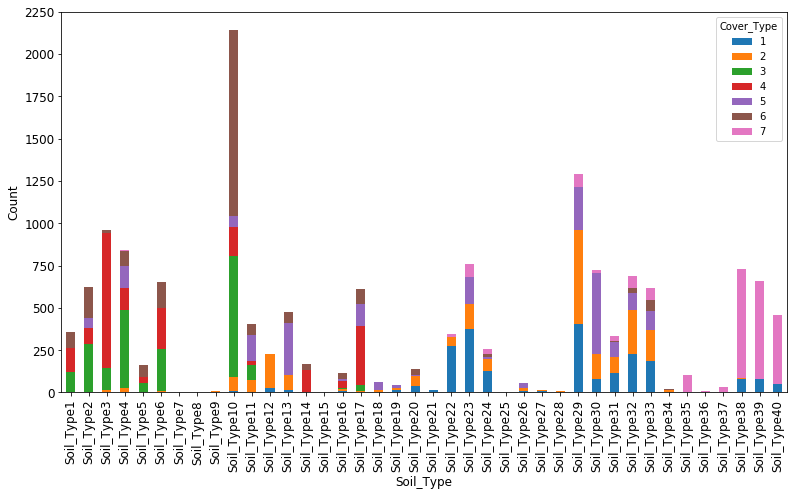

In [8]:
col_names_soiltype = [x for x in train.columns.tolist() if "Soil_Type" in x]
types_sum = train[col_names_soiltype].groupby(train['Cover_Type']).sum()
ax = types_sum.T.plot(kind='bar', stacked=True, figsize=(13, 7), legend=True, fontsize=12)
ax.set_xlabel("Soil_Type", fontsize=12)
ax.set_ylabel("Count", fontsize=12)
plt.show()

In [78]:
import numpy
seed = 7
scoring = 'accuracy'
X=train.drop(['Cover_Type','Soil_Type15','Soil_Type7'],1)
Y=train['Cover_Type']

In [87]:
data_num = pd.DataFrame(X.iloc[:,0:10])
data_cat = pd.DataFrame(X.iloc[:,11:])

In [92]:
#Standardized
#Apply transform only for non-categorical data
temp_train = pd.DataFrame(StandardScaler().fit_transform(data_num), columns=data_num.columns)
#Concatenate non-categorical data and categorical
train_X = pd.concat([temp_train,data_cat],1)
train_X.head()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type31,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40
0,-0.367095,-0.959980,-1.597132,0.146639,-0.834074,-0.908681,0.271454,0.571653,0.281259,4.334805,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,-0.381461,-0.914559,-1.715424,-0.072337,-0.932054,-0.999246,0.238732,0.703225,0.346627,4.285710,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.130912,-0.160577,-0.887379,0.194243,0.227369,1.106379,0.696843,0.834797,-0.002005,4.191156,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.085421,-0.015231,0.177250,0.070474,1.092853,1.038455,0.827731,0.834797,-0.285268,4.272981,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,-0.369489,-1.014485,-1.715424,-0.353198,-0.850404,-0.998491,0.238732,0.659368,0.324838,4.237524,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [93]:
train_X,test_X,train_y,test_y =train_test_split(X,Y,test_size=0.2,
                                                random_state=123)

# RANDOM FOREST

In [94]:
rf = sklearn.ensemble.RandomForestClassifier(n_estimators=100)
rf.fit(train_X, train_y)
rfpred = rf.predict(test_X)

In [95]:
accuracy_score(test_y, rfpred)

0.8640873015873016

# DECISION TREE

In [96]:
dt= DecisionTreeClassifier()
dt.fit(train_X, train_y)
dtpred = dt.predict(test_X)

In [97]:
accuracy_score(test_y, dtpred)

0.7857142857142857

# LOGISTIC REGRESSION

In [15]:
logreg = LogisticRegression(random_state = 123)
logreg.fit(train_X,train_y) #proses training dan hasilnya berupa model 
logregpred = logreg.predict(test_X)

In [16]:
accuracy_score(test_y, logregpred)

0.6888227513227513

# DATA TESTING

In [138]:
test.head()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type31,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40
Id,,,,,,,,,,,,,,,,,,,,,
15121,2680,354,14,0,0,2684,196,214,156,6645,...,0,0,0,0,0,0,0,0,0,0
15122,2683,0,13,0,0,2654,201,216,152,6675,...,0,0,0,0,0,0,0,0,0,0
15123,2713,16,15,0,0,2980,206,208,137,6344,...,0,0,0,0,0,0,0,0,0,0
15124,2709,24,17,0,0,2950,208,201,125,6374,...,0,0,0,0,0,0,0,0,0,0
15125,2706,29,19,0,0,2920,210,195,115,6404,...,0,0,0,0,0,0,0,0,0,0


In [139]:
dtpred1 = rf.predict(test)
dtpred1 = pd.DataFrame(dtpred1)
dtpred1.columns=['Cover_Type']
dtpred1.head()

,Cover_Type
0,2
1,2
2,2
3,2
4,2


In [140]:
myprediction = pd.concat([test.reset_index(), dtpred1], axis=1)
myprediction.head()

,Id,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
0,15121,2680,354,14,0,0,2684,196,214,156,...,0,0,0,0,0,0,0,0,0,2
1,15122,2683,0,13,0,0,2654,201,216,152,...,0,0,0,0,0,0,0,0,0,2
2,15123,2713,16,15,0,0,2980,206,208,137,...,0,0,0,0,0,0,0,0,0,2
3,15124,2709,24,17,0,0,2950,208,201,125,...,0,0,0,0,0,0,0,0,0,2
4,15125,2706,29,19,0,0,2920,210,195,115,...,0,0,0,0,0,0,0,0,0,2


In [141]:
myprediction[['Id','Cover_Type']].to_csv('myprediction-randomforest.csv',index=False)

In [144]:
# Spot Check Algorithms
models = []
models.append(('LR', LogisticRegression(random_state = 123)))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))
models.append(('RF', sklearn.ensemble.RandomForestClassifier(n_estimators=100)))
# evaluate each model in turn
results = []
names = []
for name, model in models:
    kfold = model_selection.KFold(n_splits=10, random_state=seed)
    cv_results = model_selection.cross_val_score(model, train_X, train_y, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

LR: 0.661544 (0.011046)


C:\Users\windat059246\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
C:\Users\windat059246\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
C:\Users\windat059246\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:442: UserWarning: The priors do not sum to 1. Renormalizing
  UserWarning)
C:\Users\windat059246\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
C:\Users\windat059246\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:442: UserWarning: The priors do not sum to 1. Renormalizing
  UserWarning)
C:\Users\windat059246\AppData\Local\Continuum\anaconda

LDA: 0.642527 (0.010927)
KNN: 0.799852 (0.007453)
CART: 0.779434 (0.013317)
NB: 0.588706 (0.010857)
SVM: 0.148232 (0.008472)
RF: 0.857390 (0.011534)


In [1]:
from sklearn.preprocessing import StandardScaler

In [5]:
scaler = StandardScaler()
#Untuk mencari rata-rata bilangan menggunakan fungsi fit
print(scaler.fit(train))
print("Mean data",scaler.mean_)
print("Hasil Transformasi :\n ", scaler.transform(train))

StandardScaler(copy=True, with_mean=True, with_std=True)
Mean data [2.74932255e+03 1.56676653e+02 1.65015873e+01 2.27195701e+02
 5.10765212e+01 1.71402321e+03 2.12704299e+02 2.18965608e+02
 1.35091997e+02 1.51114729e+03 2.37896825e-01 3.30026455e-02
 4.19907407e-01 3.09193122e-01 2.34788360e-02 4.12037037e-02
 6.36243386e-02 5.57539683e-02 1.09126984e-02 4.29894180e-02
 0.00000000e+00 6.61375661e-05 6.61375661e-04 1.41666667e-01
 2.68518519e-02 1.50132275e-02 3.14814815e-02 1.11772487e-02
 0.00000000e+00 7.53968254e-03 4.04761905e-02 3.96825397e-03
 3.04232804e-03 9.19312169e-03 1.05820106e-03 2.28174603e-02
 5.00661376e-02 1.69973545e-02 6.61375661e-05 3.57142857e-03
 9.92063492e-04 5.95238095e-04 8.53835979e-02 4.79497354e-02
 2.19576720e-02 4.56349206e-02 4.07407407e-02 1.45502646e-03
 6.74603175e-03 6.61375661e-04 2.24867725e-03 4.81481481e-02
 4.34523810e-02 3.03571429e-02 4.00000000e+00]
Hasil Transformasi :
  [[-0.36709512 -0.95997982 -1.59713163 ... -0.21313437 -0.1769394
   0.